In [2]:
import numpy as np

In [3]:
?np.random.randn

In [4]:
import time
def timer(func):
  def wrapper(*args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    computation_time = end_time - start_time
    print(f"Executation time of {func.__name__}: {computation_time} seconds")
    return result
  return wrapper

In [ ]:
# decorator 함수 시간 측정

In [9]:
# 데이터 만들기
# true y = 1 + 2x
true_b = 1
true_w = 2
N = 100 # number of data

np.random.seed(42) # random seed 고정
x = np.random.rand(N, 1)
epsilon = 0.1 * np.random.randn(N, 1)
y = true_b + true_w * x + epsilon
y.shape

(100, 1)

In [15]:
# Shuffle the indices
idx = np.arange(N)
split_index = int(N * 0.8)

train_idx = idx[:split_index] # 0~79 : 80개
val_idx = idx[split_index:]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

(20, 1)

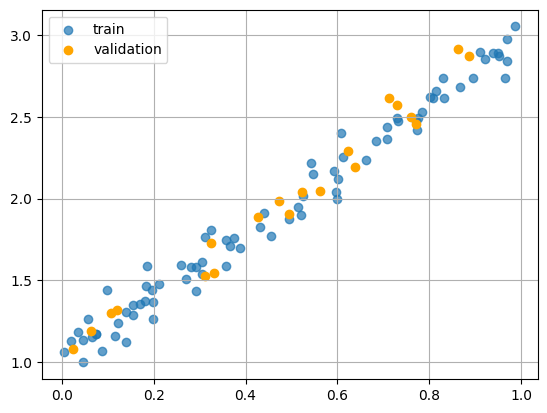

In [16]:
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train, alpha=0.7, label='train')
plt.scatter(x_val, y_val, color='orange', label='validation')
plt.legend()
plt.grid()

In [19]:
@timer
def train_model_numpy(lr=0.1, epochs=1000) :
  # Initialization
  b = np.random.randn(1)
  w = np.random.randn(1)

  for epoch in range(epochs) :
    # Loss computation
    y_hat = b + w * x_train
    error = (y_hat - y_train)
    mse_loss = np.mean(error ** 2)

    # Gradient computation
    b_grad = 2 * np.mean(error) # mse (y - (b + w * x))**2에서 b 미분
    w_grad = 2 * np.mean(x_train * error)
    b = b - lr * b_grad
    w = w - lr * w_grad

    if (epoch + 1) % 50 == 0:
      print("epoch: {}, loss: {}".format(epoch+1, mse_loss))

  return b, w

In [20]:
b_hat, w_hat = train_model_numpy()
print("b_estimate: {}, w_estimate: {}".format(b_hat, w_hat))

epoch: 50, loss: 0.035665039335678196
epoch: 100, loss: 0.01391978156847749
epoch: 150, loss: 0.009097764153839488
epoch: 200, loss: 0.008028480349677795
epoch: 250, loss: 0.007791366346237732
epoch: 300, loss: 0.007738786245044255
epoch: 350, loss: 0.007727126591875702
epoch: 400, loss: 0.0077245410602976945
epoch: 450, loss: 0.007723967717896826
epoch: 500, loss: 0.007723840579047928
epoch: 550, loss: 0.007723812385970148
epoch: 600, loss: 0.007723806134146719
epoch: 650, loss: 0.0077238047478030035
epoch: 700, loss: 0.007723804440380869
epoch: 750, loss: 0.0077238043722099164
epoch: 800, loss: 0.007723804357092992
epoch: 850, loss: 0.0077238043537408065
epoch: 900, loss: 0.007723804352997463
epoch: 950, loss: 0.00772380435283262
epoch: 1000, loss: 0.007723804352796073
Executation time of train_model_numpy: 0.05468392372131348 seconds
b_estimate: [1.0234136], w_estimate: [1.93680757]


# PyTorch

In [68]:
import torch

# create tensor at CPU
x_train_tensor = torch.as_tensor(x_train) # x_train : NumPy -> PyTorch Tensor 형태로 변환
y_train_tensor = torch.as_tensor(y_train)

# create tensor at GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_train_tensor = torch.as_tensor(x_train).to(device)
y_train_tensor = torch.as_tensor(y_train).to(device)


In [69]:
@timer
def train_model_torch(lr=0.1, epochs=1000) :
  # Initialization
  b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device) # numpy와 매우 유사하나 randn부분 다르고 뒤에 인자도 다름
  w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device) # requires_grad=True하면 파라미터로 인식하고 트래킹함. with torch.no_grad()에서 이를 잠시 멈추게 하여 연산 섞이는 것을 방지.

  for epoch in range(epochs) :
    # Loss computation
    y_hat = b + w * x_train_tensor
    error = (y_hat - y_train_tensor)
    mse_loss = torch.mean(error ** 2)

    # Gradient computation - numpy는 직접 계산했지만, pytorch에서는 backward() 쓰면 알아서 미분 계산
    mse_loss.backward()
    with torch.no_grad() : # -= 이라는 inplace 연산의 안정성을 위해 torch의 tracking을 막는다.
      b -= lr * b.grad # in-place operation 장: 빠름. 원래는 b를 copy해놓고 빼고 새로 저장 / 단: loss.backward와 연산이 섞이게 될 수 있음. 그래서 with torch.no_grad() 추가
      w -= lr * w.grad
    b.grad.zero_() # 다음 연산을 위해 초기화
    w.grad.zero_() # PyTorch에서 _ 있는 것은 in-place 연산

    if (epoch + 1) % 50 == 0:
      print("epoch: {}, loss: {}".format(epoch+1, mse_loss))

  return b, w

In [70]:
b_hat, w_hat = train_model_torch()
print("b_estimate: {}, w_estimate: {}".format(b_hat, w_hat))

epoch: 50, loss: 0.042911365682196514
epoch: 100, loss: 0.015526659038405059
epoch: 150, loss: 0.009454094688870854
epoch: 200, loss: 0.008107495224346587
epoch: 250, loss: 0.007808886612357427
epoch: 300, loss: 0.007742671540410935
epoch: 350, loss: 0.00772798791097894
epoch: 400, loss: 0.007724731929693466
epoch: 450, loss: 0.007724010009459609
epoch: 500, loss: 0.007723849976617918
epoch: 550, loss: 0.007723814466157589
epoch: 600, loss: 0.007723806596241118
epoch: 650, loss: 0.0077238048524712055
epoch: 700, loss: 0.007723804465587955
epoch: 750, loss: 0.007723804379666123
epoch: 800, loss: 0.007723804359048531
epoch: 850, loss: 0.007723804354615011
epoch: 900, loss: 0.007723804354615011
epoch: 950, loss: 0.007723804354615011
epoch: 1000, loss: 0.007723804354615011
Executation time of train_model_torch: 0.5592207908630371 seconds
b_estimate: tensor([1.0234], device='cuda:0', requires_grad=True), w_estimate: tensor([1.9368], device='cuda:0', requires_grad=True)


In [21]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=b8a036e657d9fa419fabc2ba480ed676eff9da1d99fb83699b74be2e646c0a91
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


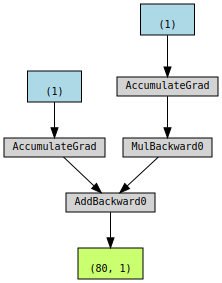

In [30]:
from torchviz import make_dot
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
y_hat = b + w * x_train_tensor
make_dot(y_hat) # 연산 그래프

In [33]:
import torch.optim as optim
import torch.nn as nn

@timer
def train_model_torch2(lr=0.1, epochs=1000):
  #Initialize parameters
  b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  w2 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  parameters = [b, w, w2]
  optimizer = optim.SGD(parameters, lr=lr)
  mse_loss = nn.MSELoss()

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train_tensor + w2 * (x_train_tensor ** 2)
    loss = mse_loss(y_hat, y_train_tensor)

    # Gradient computation desent
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1) % 50 == 0:
      print("epoch: {}, loss: {}".format(epoch+1, loss))

  return b, w, w2

In [34]:
b_hat, w_hat, w2_hat = train_model_torch2()
print("b_estimate: {}, w_estimate: {}, w2_estimate: {}".format(b_hat, w_hat, w2_hat))

epoch: 50, loss: 0.010378870542521847
epoch: 100, loss: 0.00949455258187424
epoch: 150, loss: 0.00934325710569908
epoch: 200, loss: 0.009241799246632598
epoch: 250, loss: 0.009148280425911818
epoch: 300, loss: 0.00905988737192898
epoch: 350, loss: 0.00897620048211777
epoch: 400, loss: 0.008896961379792439
epoch: 450, loss: 0.008821932186300039
epoch: 500, loss: 0.008750890140868273
epoch: 550, loss: 0.008683622661991125
epoch: 600, loss: 0.008619930452634686
epoch: 650, loss: 0.008559622891022592
epoch: 700, loss: 0.008502520389293671
epoch: 750, loss: 0.008448452479351746
epoch: 800, loss: 0.008397257876485313
epoch: 850, loss: 0.008348782716347841
epoch: 900, loss: 0.008302881513553679
epoch: 950, loss: 0.008259420332109718
epoch: 1000, loss: 0.008218268513281116
Executation time of train_model_torch2: 0.8403844833374023 seconds
b_estimate: tensor([1.1147], device='cuda:0', requires_grad=True), w_estimate: tensor([1.3644], device='cuda:0', requires_grad=True), w2_estimate: tensor([0.

# Quiz

In [71]:
# test 데이터 만들기
true_b = 1
true_w = 2
N = 100 # number of data

x_test_tensor = torch.randn((N,1), dtype=torch.float, device=device)
epsilon = 0.1 * torch.randn((N,1), dtype=torch.float, device=device)
y_test_tensor = true_b + true_w * x + epsilon
y_test_tensor.shape

torch.Size([20, 1])

In [89]:
def test_model (b, w, x_test_tensor, y_test_tensor) :
  y_test_hat = b + w * x_test_tensor

  # Calculate MSE
  mse = torch.mean((y_test_tensor - y_test_hat) ** 2)

  return mse.item()

In [90]:
print(test_model(b_hat, w_hat, x_test_tensor, y_test_tensor))

0.012227172031998634


In [86]:
@timer
def test_model_torch(b, w, x_test_tensor, y_test_tensor) :
  y_hat = b + w * x_test_tensor
  error = (y_test_tensor - y_hat)
  loss = torch.mean(error ** 2)
  print(loss)

In [87]:
test_model_torch(b_hat, b_hat, x_test_tensor, y_test_tensor)

tensor(1.2279, device='cuda:0', grad_fn=<MeanBackward0>)
Executation time of test_model_torch: 0.0018820762634277344 seconds


In [77]:
x_test_tensor[5]

tensor([-1.5329], device='cuda:0')

In [85]:
true_b = 1
true_w = 2
N = 20 # number of data

x_test_tensor = torch.randn((N,1), dtype=torch.float, device=device)
epsilon = 0.1 * torch.randn((N,1), dtype=torch.float, device=device)

y_test_tensor = true_b + true_w * x_test_tensor + epsilon


In [84]:
# 잘 됐던거
# mse error 함수
def test_torch(b_hat, w_hat, x_test_tensor, y_test_tensor) :
  sum = 0
  for i in range(N):
    y_estimate = b_hat+ w_hat * x_test_tensor[i]
    error = (y_estimate - y_test_tensor[i])
    mse_loss = torch.mean(error ** 2)
    sum = sum + mse_loss
  sum = sum / N
  return sum

# 결과
mse_error = test_torch(b_hat, w_hat, x_test_tensor, y_test_tensor)
print(mse_error)


tensor(0.0094, device='cuda:0', grad_fn=<DivBackward0>)


# Quiz 2

In [88]:
from google.colab import drive
drive.mount('/content/MyDrive/')

Mounted at /content/MyDrive/
